In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.datasets import mnist

from my_ai_utils import *

In [2]:
import matplotlib.pyplot as plt
def test(model, test_images, test_labels):
    # Prédictions sur quelques images
    predictions = model.predict(test_images)

    # Afficher quelques images avec leurs prédictions
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(f'Predicted: {tf.argmax(predictions[i])}, True: {test_labels[i]}')
    plt.show()

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images = train_images / 255.0
#test_images = test_images / 255.0
# train_labels = Preprocess.one_hot_encode(train_labels)
# test_labels = Preprocess.one_hot_encode(test_labels)
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


Model : 'sequential' 
________________________________________________________

Layer (type)			 Params #

flatten (Flatten)			0

batchnormalization (BatchNormalization)			0

dense (Dense)			100480

batchnormalization_1 (BatchNormalization)			0

dense_1 (Dense)			2064

batchnormalization_2 (BatchNormalization)			0

dense_2 (Dense)			170


Total params: 102714


Training data dimensions:  (47999, 28, 28)
Epoch 1/5


100%|██████████| 1500/1500 [00:10<00:00, 147.34it/s, train_loss=0.098, val_loss=0.211, accuracy=0.948]


Epoch 2/5


100%|██████████| 1500/1500 [00:07<00:00, 188.05it/s, train_loss=0.0643, val_loss=0.16, accuracy=0.962]


Epoch 3/5


100%|██████████| 1500/1500 [00:08<00:00, 184.90it/s, train_loss=0.0522, val_loss=0.154, accuracy=0.963]


Epoch 4/5


100%|██████████| 1500/1500 [00:08<00:00, 184.94it/s, train_loss=0.0262, val_loss=0.152, accuracy=0.965]


Epoch 5/5


100%|██████████| 1500/1500 [00:09<00:00, 166.49it/s, train_loss=0.0242, val_loss=0.152, accuracy=0.964]


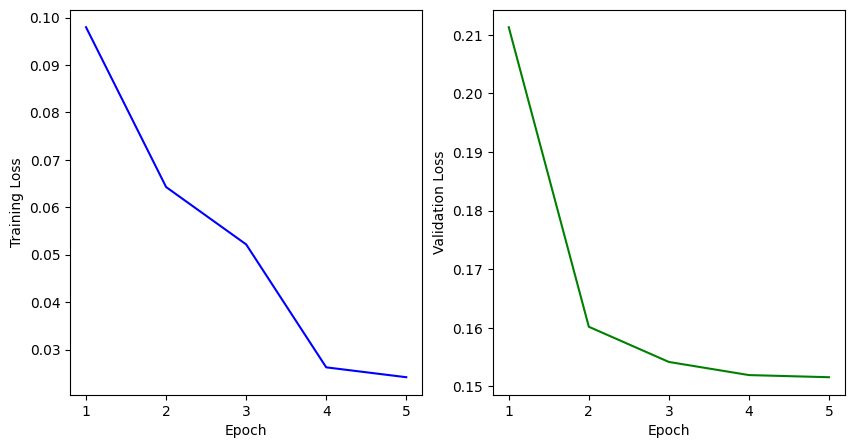

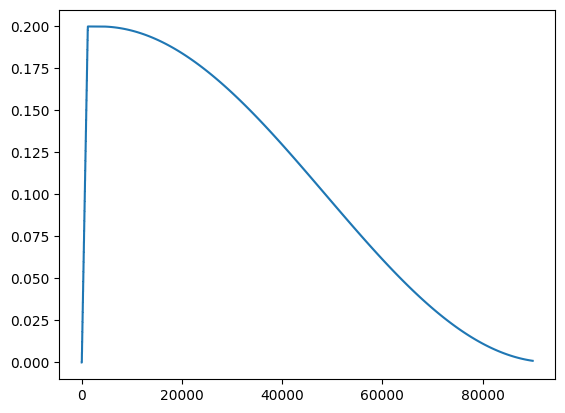

In [7]:
np.random.seed(42)
model = NeuralNet(usage=Usage.multiClassification)
model.add_layer(Flatten(input_shape=(28, 28)))
model.add_layer(BatchNormalization(28*28))
model.add_layer(Dense(28*28, 128, activation="reLu"))
model.add_layer(BatchNormalization(128))
model.add_layer(Dense(128, 16, activation="reLu"))
model.add_layer(BatchNormalization(16))
model.add_layer(Dense(16, 10, activation="softmax", classes=[_ for _ in range(10)]))

# learning_rate schedulers
lr = CosineDecay(initial_lr=0.2, alpha=0.001, warmup=True, warmup_steps=100, hold_steps=200)
# lr = ExponentialDecay(initial_lr=0.2, decay_rate=0.2, warmup=True, warmup_steps=100, hold_steps=100)

model.compile(loss_fn=Loss("categorical_cross_entropy"), optimizer=Adam(0.9, 0.999, lr=lr))
model.summary()
model.train(train_images, Processing.one_hot_encode(train_labels), nepochs=5, batch_size=32)

#model.cross_validate(k=3, train_X=train_images, train_Y=Processing.one_hot_encode(train_labels), nepochs=5, batch_size=256)
model.show_lr_evolution()

 accuracy: 0.9682  


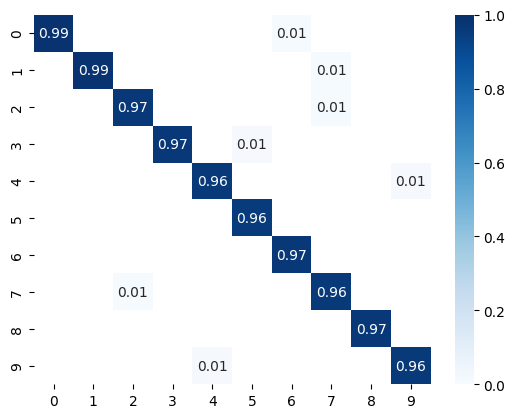

In [8]:
eval_metrics = model.evaluate(test_images, Processing.one_hot_encode(test_labels))

In [ ]:
test(model, test_images, test_labels)

In [ ]:
### Reference test Tensorflow models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiler le modèle
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=5)
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

In [ ]:
test(model, test_images, test_labels)